In [1]:

import pandas as pd
import numpy as np
import seaborn as sb

In [10]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

print("=== train.info() ===")
train.info()

print("\n=== test.info() ===")
test.info()

print("\n=== train 缺失值统计 ===")
print(train.isnull().sum())

print("\n=== test 缺失值统计 ===")
print(test.isnull().sum())


=== train.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB

=== test.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB

=== train 缺失值统计 ===
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype:

In [11]:
train['date'] = pd.to_datetime(train['date'] , errors='coerce')

print(train.info())
print(train['date'].head)
train.to_csv("../clean_data/train_clean.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB
None
<bound method NDFrame.head of 0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
3000883   2017-08-15
3000884   2017-08-15
3000885   2017-08-15
3000886   2017-08-15
3000887   2017-08-15
Name: date, Length: 3000888, dtype: datetime64[ns]>


In [12]:
test['date'] = pd.to_datetime(test['date'] , errors='coerce')

print(test.info())
print(test['date'].head)
test.to_csv("../clean_data/test_clean.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB
None
<bound method NDFrame.head of 0       2017-08-16
1       2017-08-16
2       2017-08-16
3       2017-08-16
4       2017-08-16
           ...    
28507   2017-08-31
28508   2017-08-31
28509   2017-08-31
28510   2017-08-31
28511   2017-08-31
Name: date, Length: 28512, dtype: datetime64[ns]>


In [13]:

train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['weekday'] = train['date'].dt.weekday
print(train[['date', 'year', 'month', 'weekday']].head())
train.to_csv("../clean_data/train_clean.csv", index=False)


        date  year  month  weekday
0 2013-01-01  2013      1        1
1 2013-01-01  2013      1        1
2 2013-01-01  2013      1        1
3 2013-01-01  2013      1        1
4 2013-01-01  2013      1        1


In [14]:
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['weekday'] = test['date'].dt.weekday
print(test[['date', 'year', 'month', 'weekday']].head())
test.to_csv("../clean_data/test_clean.csv", index=False)

        date  year  month  weekday
0 2017-08-16  2017      8        2
1 2017-08-16  2017      8        2
2 2017-08-16  2017      8        2
3 2017-08-16  2017      8        2
4 2017-08-16  2017      8        2


In [15]:
holidays = pd.read_csv("../data/holidays_events.csv")
holidays['date'] = pd.to_datetime(holidays['date'], errors='coerce')

train = train.merge(holidays[['date', 'type', 'description']],on='date', how='left')

train['is_holiday'] = train['type'].notnull().astype(int)

train['holiday_type'] = train['type'].fillna('None')

train['holiday_name'] = train['description'].fillna('')

print(train[['date', 'is_holiday', 'holiday_type', 'holiday_name']].head())

train.to_csv("../clean_data/train_clean.csv", index=False)


        date  is_holiday holiday_type        holiday_name
0 2013-01-01           1      Holiday  Primer dia del ano
1 2013-01-01           1      Holiday  Primer dia del ano
2 2013-01-01           1      Holiday  Primer dia del ano
3 2013-01-01           1      Holiday  Primer dia del ano
4 2013-01-01           1      Holiday  Primer dia del ano


In [16]:
test = test.merge(holidays[['date', 'type', 'description']],on='date', how='left')

test['is_holiday'] = test['type'].notnull().astype(int)

test['holiday_type'] = test['type'].fillna('None')

test['holiday_name'] = test['description'].fillna('')

print(test[['date', 'is_holiday', 'holiday_type', 'holiday_name']].head())

test.to_csv("../clean_data/test_clean.csv", index=False)

        date  is_holiday holiday_type holiday_name
0 2017-08-16           0         None             
1 2017-08-16           0         None             
2 2017-08-16           0         None             
3 2017-08-16           0         None             
4 2017-08-16           0         None             


In [7]:
transaction = pd.read_csv("../clean_data/transactions_clean.csv")

result = transaction.groupby(["store_nbr", "date"])["transactions"].sum().reset_index()

print(result)


       store_nbr        date  transactions
0              1  2013-01-02          2111
1              1  2013-01-03          1833
2              1  2013-01-04          1863
3              1  2013-01-05          1509
4              1  2013-01-06           520
...          ...         ...           ...
83483         54  2017-08-11           768
83484         54  2017-08-12           903
83485         54  2017-08-13          1054
83486         54  2017-08-14           818
83487         54  2017-08-15           802

[83488 rows x 3 columns]


In [ ]:
result.to_csv("../clean_data/result.csv", index=False)
#result为每个store每天交易总量（Tasks5）

In [ ]:
train = pd.read_csv("../clean_data/train_clean.csv")
stores = pd.read_csv("../data/stores.csv")
train_merged = train.merge(stores, on="store_nbr", how="left")
train_merged.to_csv("../clean_data/train_with_store_info.csv", index=False)
print(train_merged.head())
#(Tasks6)

C:\Users\Selin\AppData\Local\Temp\ipykernel_21008\109851828.py:1: DtypeWarning: Columns (9,10,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../clean_data/train_clean.csv")


   id        date  store_nbr      family  sales  onpromotion  year  month  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1   
1   1  2013-01-01          1   BABY CARE    0.0            0  2013      1   
2   2  2013-01-01          1      BEAUTY    0.0            0  2013      1   
3   3  2013-01-01          1   BEVERAGES    0.0            0  2013      1   
4   4  2013-01-01          1       BOOKS    0.0            0  2013      1   

   weekday   type_x         description  is_holiday holiday_type  \
0        1  Holiday  Primer dia del ano           1      Holiday   
1        1  Holiday  Primer dia del ano           1      Holiday   
2        1  Holiday  Primer dia del ano           1      Holiday   
3        1  Holiday  Primer dia del ano           1      Holiday   
4        1  Holiday  Primer dia del ano           1      Holiday   

         holiday_name  is_promo       city_family   city      state type_y  \
0  Primer dia del ano         0  Quito_AUTOMOTIVE 

In [23]:
train = pd.read_csv("../clean_data/train_with_store_info.csv")
oil = pd.read_csv("../data/oil.csv")
train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])
train = train.merge(oil[['date','dcoilwtico']], on='date', how='left')
train.to_csv('../clean_data/train_with_store_oil.csv', index=False)
print(train.head())
#(Tasks7)


C:\Users\Selin\AppData\Local\Temp\ipykernel_21008\46489768.py:1: DtypeWarning: Columns (9,10,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../clean_data/train_with_store_info.csv")


   id       date  store_nbr      family  sales  onpromotion  year  month  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1   

   weekday   type_x  ... is_holiday  holiday_type        holiday_name  \
0        1  Holiday  ...          1       Holiday  Primer dia del ano   
1        1  Holiday  ...          1       Holiday  Primer dia del ano   
2        1  Holiday  ...          1       Holiday  Primer dia del ano   
3        1  Holiday  ...          1       Holiday  Primer dia del ano   
4        1  Holiday  ...          1       Holiday  Primer dia del ano   

  is_promo       city_family   city      state type_y cluster  dcoilwtico  
0        0  Quito_AUTOMOTIVE

In [2]:
train = pd.read_csv("../clean_data/train_with_store_oil.csv")
holidays = pd.read_csv("../data/holidays_events.csv")
train['date'] = pd.to_datetime(train['date'])
holidays['date'] = pd.to_datetime(holidays['date'])

train = train.merge(
    holidays[['date', 'locale', 'locale_name', 'transferred']],
    on='date',
    how='left')

train.to_csv('../clean_data/train_final.csv', index=False)
print(train.head())
#(Tasks8)


C:\Users\Selin\AppData\Local\Temp\ipykernel_23652\2657301289.py:1: DtypeWarning: Columns (9,10,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../clean_data/train_with_store_oil.csv")


   id       date  store_nbr      family  sales  onpromotion  year  month  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1   

   weekday   type_x  ... sales_norm  is_promo   city      state  type_y  \
0        1  Holiday  ...        0.0         0  Quito  Pichincha       D   
1        1  Holiday  ...        0.0         0  Quito  Pichincha       D   
2        1  Holiday  ...        0.0         0  Quito  Pichincha       D   
3        1  Holiday  ...        0.0         0  Quito  Pichincha       D   
4        1  Holiday  ...        0.0         0  Quito  Pichincha       D   

   cluster dcoilwtico    locale locale_name  transferred  
0       13        NaN  National  

C:\Users\Selin\AppData\Local\Temp\ipykernel_23652\4014410400.py:2: DtypeWarning: Columns (9,10,12,13,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../clean_data/train_final.csv')


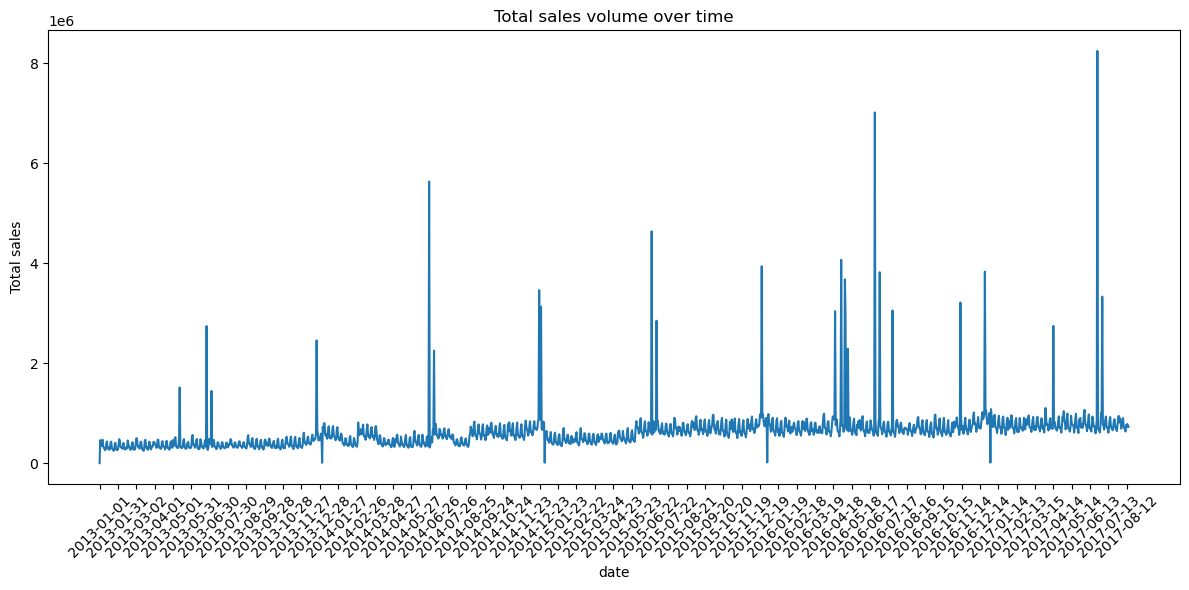

In [14]:
import matplotlib.pyplot as plt
train = pd.read_csv('../clean_data/train_final.csv')
daily_sales = train.groupby('date')['sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], daily_sales['sales'])
plt.xticks(daily_sales['date'][::30], rotation=45)
plt.xlabel('date')
plt.ylabel('Total sales')
plt.title('Total sales volume over time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

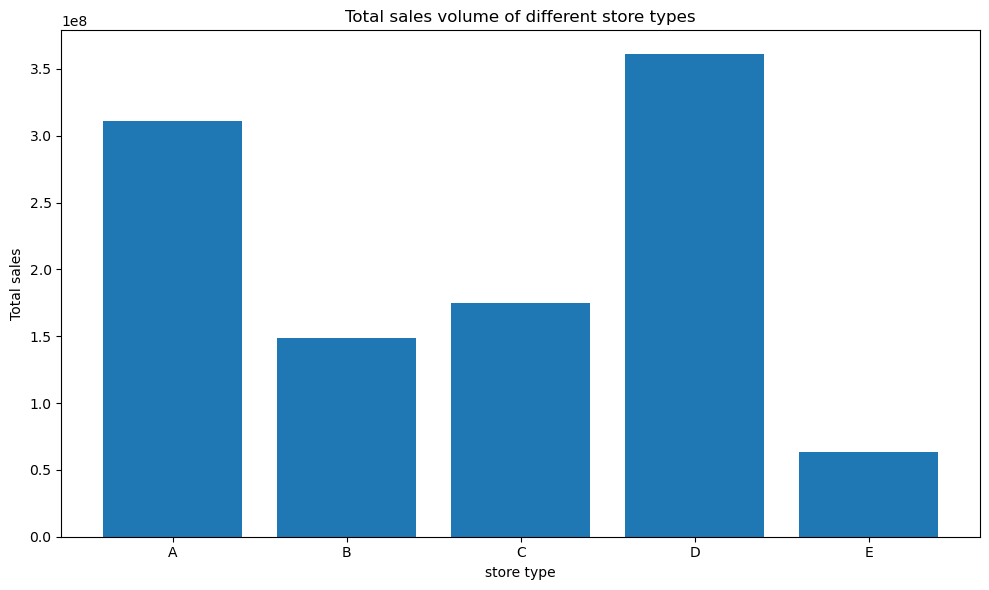

In [7]:
store_sales = train.groupby('type_y')['sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(store_sales['type_y'], store_sales['sales'])

plt.xlabel('store type')
plt.ylabel('Total sales')
plt.title('Total sales volume of different store types')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

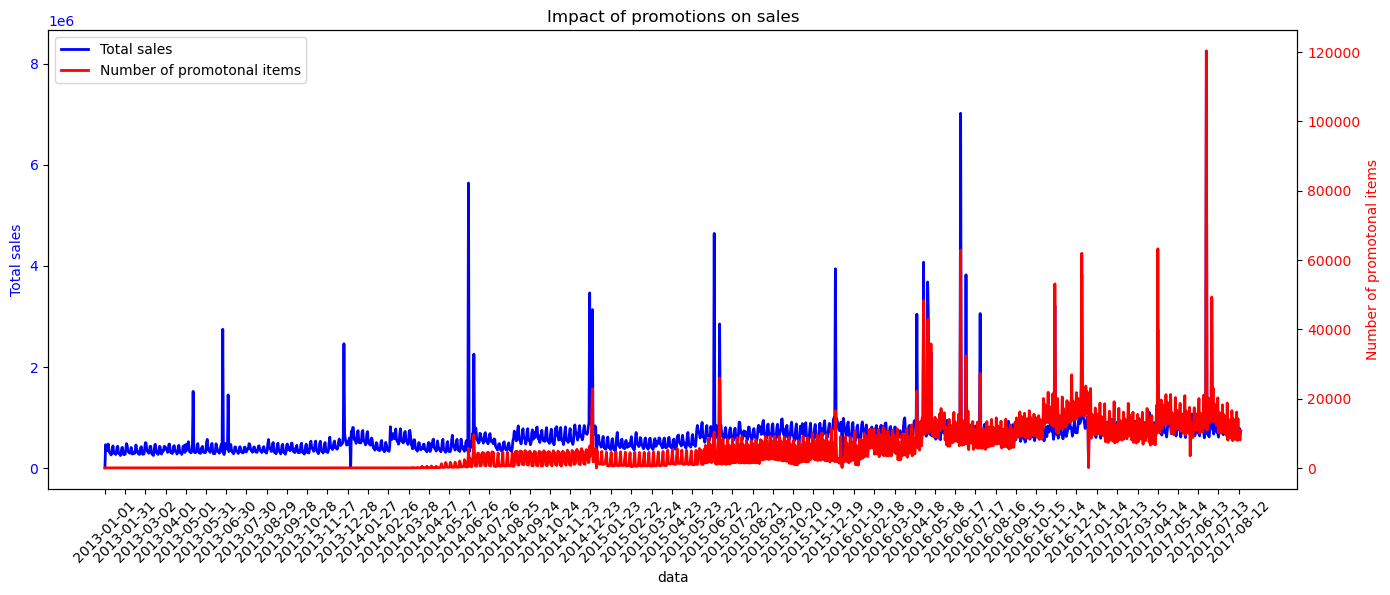

In [26]:
train['date'] = pd.to_datetime(train['date'])
daily_summary = train.groupby('date').agg({'sales':'sum', 'onpromotion':'sum'}).reset_index()
fig, ax1 = plt.subplots(figsize=(14,6))
ax2 = ax1.twinx()
ax1.plot(daily_summary['date'], daily_summary['sales'], color='blue', label='Total sales', linewidth=2)
ax1.set_ylabel('Total sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.plot(daily_summary['date'], daily_summary['onpromotion'], color='red', label='Number of promotonal items', linewidth=2)
ax2.set_ylabel('Number of promotonal items', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_xlabel('data')
ax1.set_xticks(daily_summary['date'][::30])
ax1.set_xticklabels(daily_summary['date'][::30].dt.strftime('%Y-%m-%d'), rotation=45)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
fig.tight_layout()
plt.title('Impact of promotions on sales')
plt.show()
